<a href="https://colab.research.google.com/github/AIhexNICK-MAIL-RU/basics_python/blob/main/gb_lec4_visual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Подключение библиотек и скриптов

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Считываем датасет sep=';
df = pd.read_csv('bank.csv')
df.sample(n=10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
38156,29,blue-collar,married,secondary,no,940,yes,yes,cellular,15,may,382,1,-1,0,unknown,yes
21903,55,blue-collar,married,secondary,no,1218,no,no,cellular,20,aug,107,2,-1,0,unknown,no
35686,30,blue-collar,married,secondary,no,194,yes,no,cellular,8,may,475,3,-1,0,unknown,no
27132,52,services,divorced,secondary,no,2455,no,no,telephone,21,nov,76,1,119,1,failure,no
11395,41,self-employed,single,unknown,no,426,yes,no,unknown,19,jun,75,1,-1,0,unknown,no
44606,27,student,single,primary,yes,25,no,no,unknown,28,aug,8,1,-1,0,unknown,no
20552,37,unemployed,married,secondary,no,117,no,no,cellular,12,aug,144,4,-1,0,unknown,no
40575,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
12323,30,technician,married,tertiary,no,526,yes,yes,unknown,26,jun,677,3,-1,0,unknown,yes
41641,57,management,married,tertiary,no,10583,no,no,cellular,28,sep,341,3,98,3,success,yes


Стандартный ситнаксис создания графика

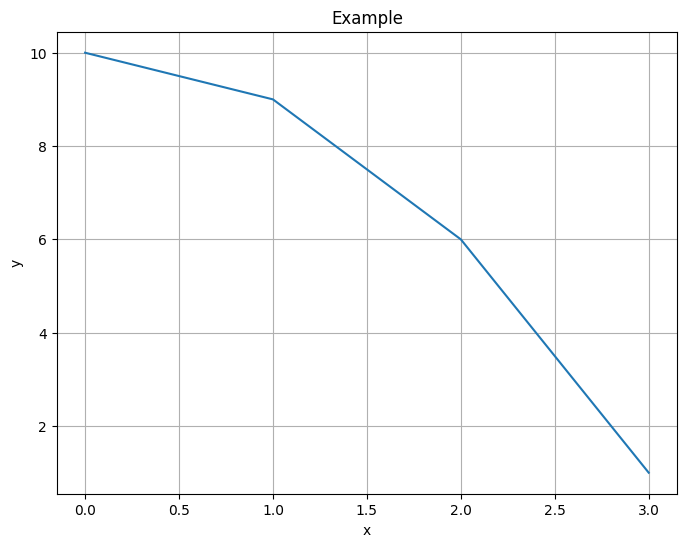

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot([0, 1, 2, 3], [10, 9, 6, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Example')
plt.grid();

## Виды графиков

### Линейный график

In [ ]:
 # Готовим данные для графика в виде сводной таблицы
 data = df.groupby('month')['job'].agg(count='count').reset_index().sort_values(by='month')
 data.head()

,month,count
0,apr,2932
1,aug,6247
2,dec,214
3,feb,2649
4,jan,1403


# Matplotlib

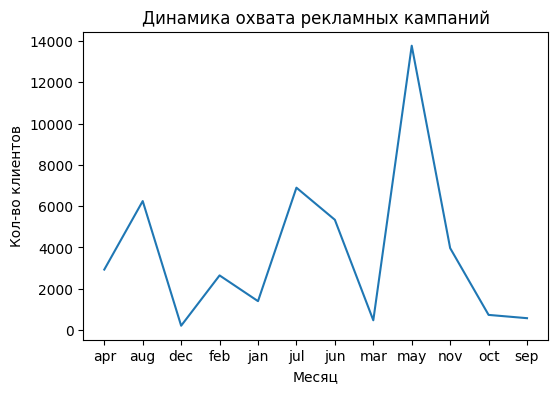

In [ ]:
plt.figure(figsize=(6,4))

plt.plot(data['month'], data['count'])

plt.title('Динамика охвата рекламных кампаний')
plt.xlabel('Месяц')
plt.ylabel('Кол-во клиентов');

### Seaborn

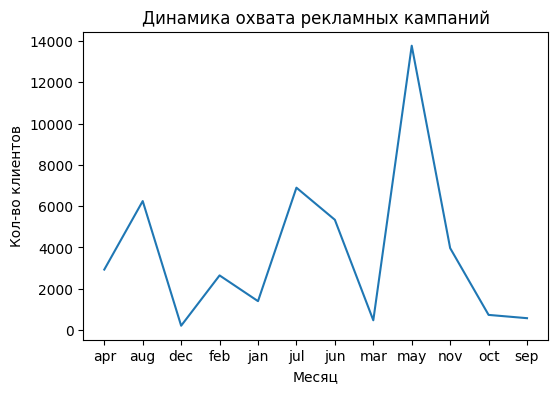

In [ ]:
plt.figure(figsize=(6,4))

sns.lineplot(x=data['month'], y=data['count'])

plt.title('Динамика охвата рекламных кампаний')
plt.xlabel('Месяц')
plt.ylabel('Кол-во клиентов'); # зачем в конце ; - ?

## Гистограмма

### Matplotlib

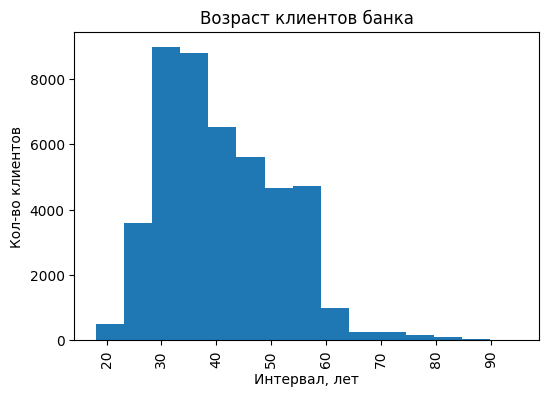

In [ ]:
plt.figure(figsize=(6,4))

plt.hist(df['age'], bins=15) # bins - интервалы

plt.title('Возраст клиентов банка')
plt.xlabel('Интервал, лет')
plt.ylabel('Кол-во клиентов'); # если не ставить ; то будет выводиться Text(0, 0.5, 'Кол-во клиентов')
plt.xticks(rotation=90);

### Seaborn

Text(0, 0.5, 'Кол-во клиентов')

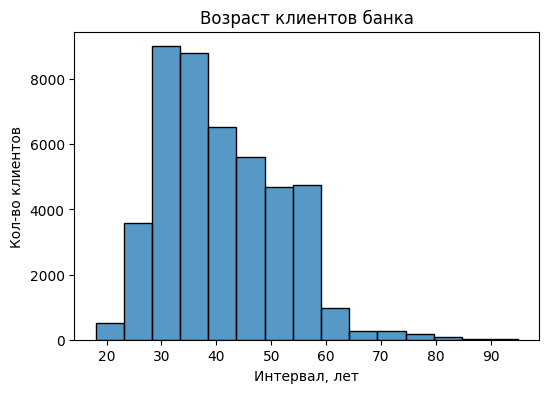

In [ ]:
plt.figure(figsize=(6,4))

sns.histplot(df['age'], bins=15)

plt.title('Возраст клиентов банка')
plt.xlabel('Интервал, лет')
plt.ylabel('Кол-во клиентов')

#### Диаграмма рассеяния

In [ ]:
# Готовим данные для графика в виде сводной таблицы
data = df.groupby('age')['previous'].sum().reset_index() # вместо previous должно быть convert (была/не была покупка), но это др датасет
data.head()

,age,previous
0,18,6
1,19,22
2,20,52
3,21,47
4,22,75


#### Matplotlib

Text(0, 0.5, 'Покупки')

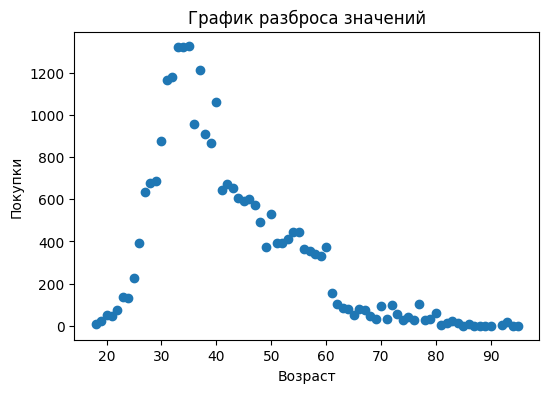

In [ ]:
plt.figure(figsize=(6,4))

plt.scatter(data['age'], data['previous'])

plt.title('График разброса значений')
plt.xlabel('Возраст')
plt.ylabel('Покупки')
#plt.xticks(rotation=30);

#### Seaborn

In [ ]:
plt.figure(figsize=(6,4))

sns.scatterplot(x=data['age'], y = ['previous'])

plt.title('График разброса значений')
plt.xlabel('Возраст')
plt.ylabel('Покупки');

ValueError: ignored

<Figure size 600x400 with 0 Axes>

#### Столбчатые диаграммы

In [ ]:
# Готовим данные для графика
data = df['job'].value_counts().reset_index()
data.head()

,index,job
0,blue-collar,9732
1,management,9458
2,technician,7597
3,admin.,5171
4,services,4154


#### Matplotlib

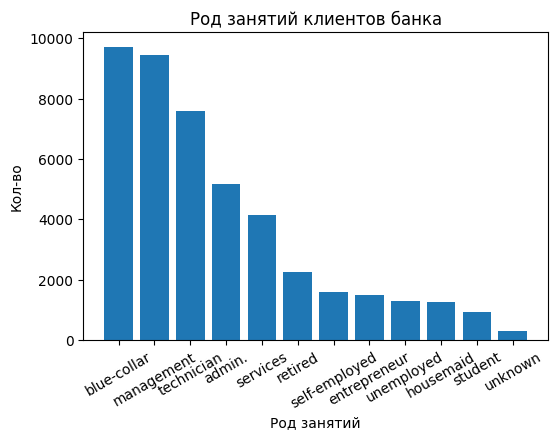

In [ ]:
plt.figure(figsize=(6,4))

plt.bar(data['index'], data['job'])

plt.title('Род занятий клиентов банка')
plt.xlabel('Род занятий')
plt.ylabel('Кол-во')
plt.xticks(rotation=30);

#### Seaborn

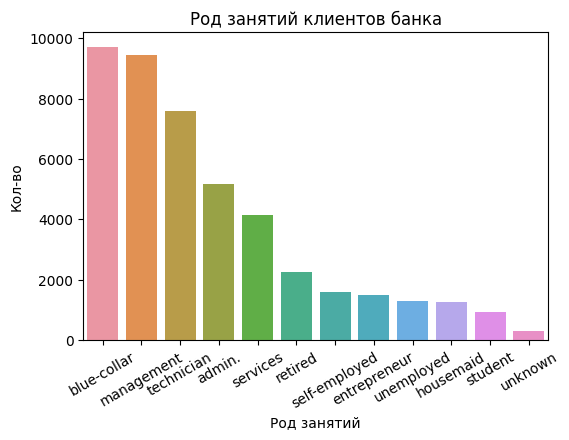

In [ ]:
plt.figure(figsize=(6,4))

sns.barplot(x=data['index'], y = data['job'])

plt.title('Род занятий клиентов банка')
plt.xlabel('Род занятий')
plt.ylabel('Кол-во')
plt.xticks(rotation=30);

#### Многорядовые столбчатые диаграммы

In [ ]:
# Готовим данные для графика
data = pd.crosstab(df['job'], df['previous']).reset_index().sort_values(by=0, ascending=False)
data.rename(columns={0: 'no', 1: 'yes'}, inplace=True)
data.head()

previous,job,no,yes,2,3,4,5,6,7,8,...,32,35,37,38,40,41,51,55,58,275
1,blue-collar,8115,587,414,212,144,86,36,35,16,...,0,0,0,0,0,1,0,0,1,0
4,management,7632,575,449,284,152,113,63,52,30,...,0,1,0,2,0,0,1,0,0,1
9,technician,6255,441,341,175,117,79,51,32,25,...,0,0,0,0,1,0,0,1,0,0
0,admin.,4082,377,274,130,104,56,35,26,18,...,1,0,0,0,0,0,0,0,0,0
7,services,3448,239,189,99,57,35,31,13,15,...,0,0,0,0,0,0,0,0,0,0


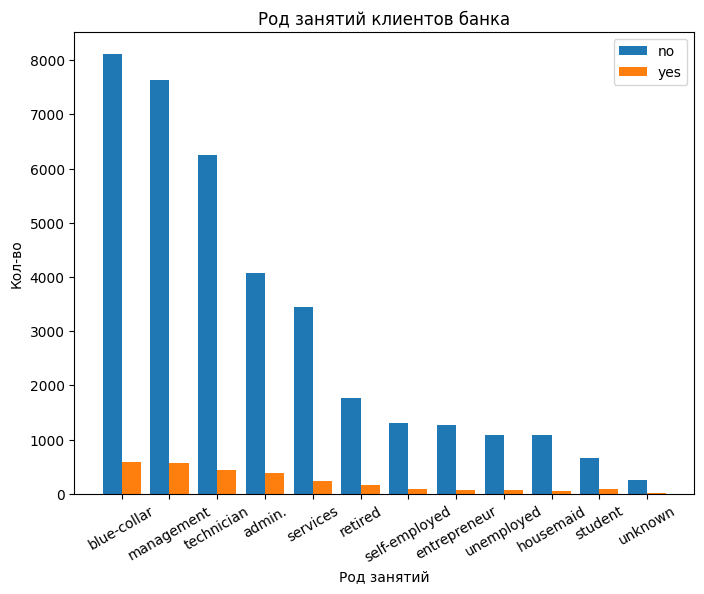

In [ ]:
# Строим столбчатую многрядную диаграмму

plt.figure(figsize=(8,6))

# определяем кол-во делений (тиков)
n_ticks = np.arange(len(data['no']))

# определяем сдвиг
offset = 0.2

# определяем ширину столбцов
w = 0.4

# добавляем сдвиг к кол-ву делений
plt.bar(n_ticks - offset, data['no'], width=w)
plt.bar(n_ticks + offset, data['yes'], width=w)

plt.title('Род занятий клиентов банка')
plt.xlabel('Род занятий')
plt.ylabel('Кол-во')
plt.legend(['no', 'yes'])
plt.xticks(n_ticks, data['job'], rotation = 30); # добавляем метки делений

#### Сложенная стобчатая диаграмма

In [ ]:
# Готовим данные для графика
data = pd.crosstab(df['job'], df['previous'], normalize = 'index').reset_index().sort_values(by = 0, ascending=False)
data.rename(columns={0: 'no', 1: 'yes'}, inplace=True)
data.head()

previous,job,no,yes,2,3,4,5,6,7,8,...,32,35,37,38,40,41,51,55,58,275
11,unknown,0.885417,0.034722,0.034722,0.010417,0.010417,0.010417,0.006944,0.006944,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
3,housemaid,0.877419,0.041129,0.028226,0.020161,0.011290,0.008065,0.000806,0.004032,0.003226,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
2,entrepreneur,0.848689,0.048420,0.039005,0.022192,0.012777,0.007397,0.007397,0.004707,0.002690,...,0.0,0.0,0.000672,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
10,unemployed,0.836531,0.061397,0.042210,0.024559,0.009977,0.005372,0.006907,0.003070,0.000767,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
1,blue-collar,0.833847,0.060316,0.042540,0.021784,0.014797,0.008837,0.003699,0.003596,0.001644,...,0.0,0.0,0.000000,0.0,0.0,0.000103,0.0,0.0,0.000103,0.0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'unknown'),
  Text(1, 0, 'housemaid'),
  Text(2, 0, 'entrepreneur'),
  Text(3, 0, 'unemployed'),
  Text(4, 0, 'blue-collar'),
  Text(5, 0, 'services'),
  Text(6, 0, 'technician'),
  Text(7, 0, 'self-employed'),
  Text(8, 0, 'management'),
  Text(9, 0, 'admin.'),
  Text(10, 0, 'retired'),
  Text(11, 0, 'student')])

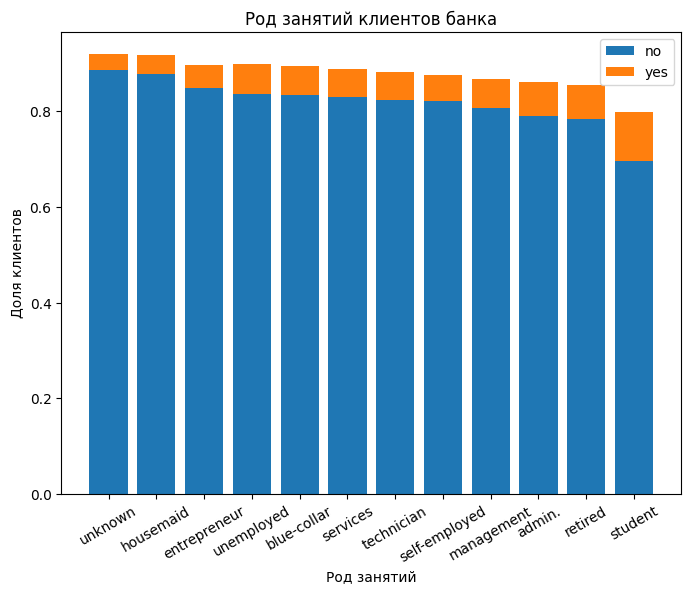

In [ ]:
# Строим столбчатую многорядную сложенную диаграмму
plt.figure(figsize=(8,6))

plt.bar(data['job'], data['no'])
plt.bar(data['job'], data['yes'], bottom=data['no']) # bottom - рисуется поверх столбиков с теми, кто брал депозиты

plt.title('Род занятий клиентов банка')
plt.xlabel('Род занятий')
plt.ylabel('Доля клиентов')
plt.legend(['no', 'yes'])
plt.xticks(rotation = 30)

#### Ящик с усами

In [ ]:
# Готовим данные для графика
data1 = df['duration'][df['previous'] == 1]
data2 = df['duration'][df['previous'] == 0]
data1.head()

24062    519
24127    449
24170     86
24189     58
24203    324
Name: duration, dtype: int64

<Axes: >

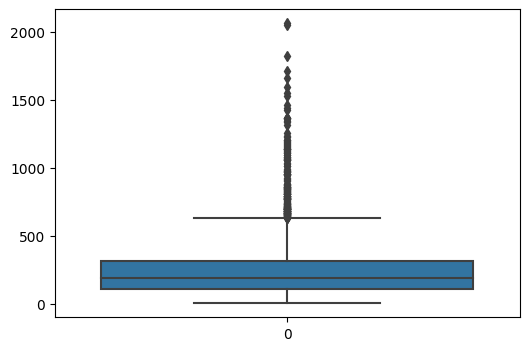

In [ ]:
plt.figure(figsize=(6,4))

sns.boxplot(data=[data1])

<Axes: xlabel='duration', ylabel='Count'>

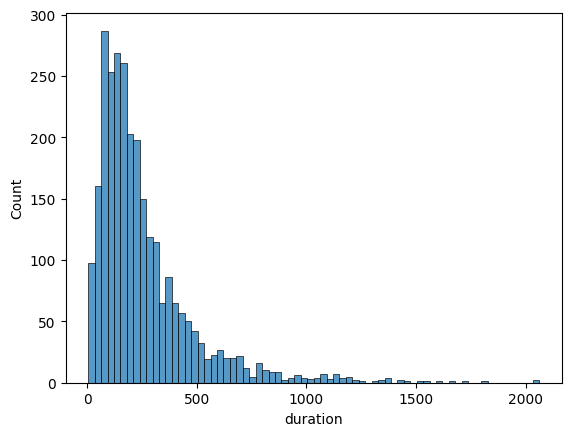

In [ ]:
sns.histplot(x=data1)

#### Matplotlib

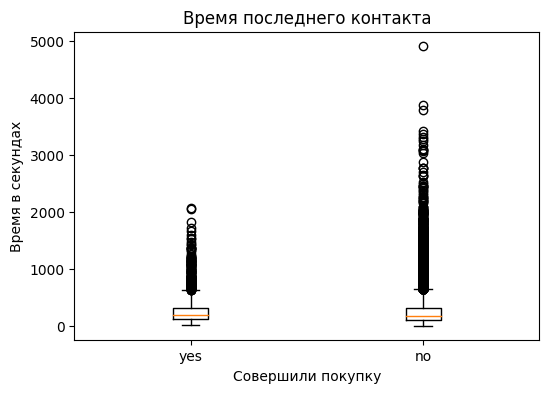

In [ ]:
# Строим боксплот
# Время последнего контакта
# Совершили покупку
# Время в секундах
plt.figure(figsize=(6,4))

plt.boxplot([data1,  data2])

plt.title('Время последнего контакта')
plt.xlabel('Совершили покупку')
plt.ylabel('Время в секундах')
plt.xticks([1,2], ['yes', 'no']);

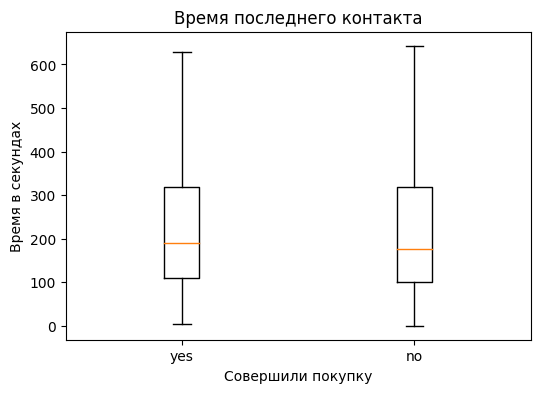

In [ ]:
# Строим боксплот без выбросов
plt.figure(figsize=(6,4))

plt.boxplot([data1,  data2], showfliers=False)

plt.title('Время последнего контакта')
plt.xlabel('Совершили покупку')
plt.ylabel('Время в секундах')
plt.xticks([1,2], ['yes', 'no']);

#### Seaborn

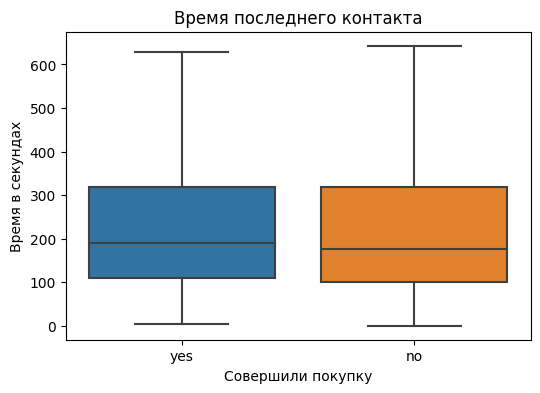

In [ ]:
# Строим боксплот без выбросов
plt.figure(figsize=(6,4))

sns.boxplot(data=[data1,  data2], showfliers=False)

plt.title('Время последнего контакта')
plt.xlabel('Совершили покупку')
plt.ylabel('Время в секундах')
plt.xticks([0,1], ['yes', 'no']);

#### Круговая диаграмма

In [ ]:
import sql

In [ ]:
data = df['job'].value_counts().reset_index()

In [ ]:
data.select('previous', 'job', 'no', 'yes').show()

AttributeError: ignored

In [ ]:
# Готовим данные для графика
data = df['previous'].value_counts()
data.index = ['no', 'yes']
data1.head()

ValueError: ignored

In [ ]:
# Готовим данные для графика
data = df['previous'].value_counts()
data.index = ['no', 'yes']
data.head()

ValueError: ignored

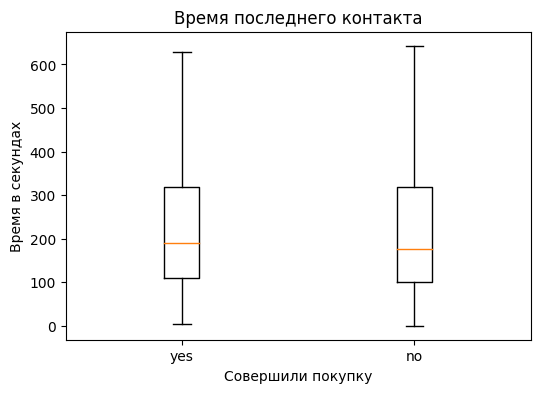

In [ ]:
# Строим боксплот без выбросов
plt.figure(figsize=(6,4))

plt.boxplot([data1,  data2], showfliers=False)

plt.title('Время последнего контакта')
plt.xlabel('Совершили покупку')
plt.ylabel('Время в секундах')
plt.xticks([1,2], ['yes', 'no']);

#### Matplotlib

ValueError: ignored

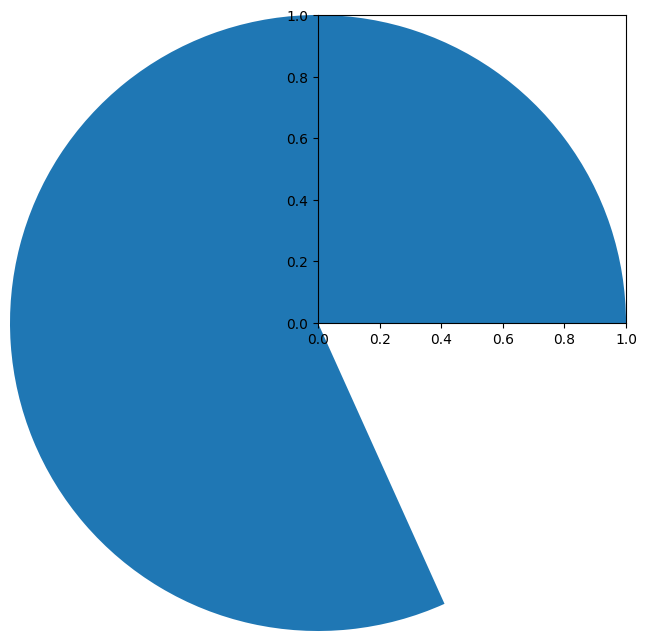

In [ ]:
# Строим круговую диаграмму
plt.figure(figsize=(6,4))

plt.pie(data, autopct='%1.1f%')

plt.title('Доля клиентов банка, открывших депозит')
plt.legend(data.index);

## Визаулизация анализ данных

#### Описание датасета

Статистические данные о ряде домов в Калифорнии, основанные на переписи 1990 года
* longitude - долгота

* latitude - широта

* housing_median_age - средний возраст дома

* total_rooms - общее количество комнат

* total_bedrooms - общее количество спален

* population - количество проживающих

* households - домохозяйства

* ocean_proximity - близость океана

* median_income - средний доход

* median_house_value - средняя стоимость дома

In [ ]:
df = pd.read_csv('housing.csv', sep=';')
df.head()

#### Распределение вещественных признаков

In [ ]:
# {'red', 'green', 'blue'} - дискретный признак ('red', 'green', 'blue', 'red', 'green', 'red')
# [0, 100] - вещественный признак (0, 5, 5.6, 10.5, 10.57)

In [ ]:
plt.figure(figsize=(8,6))

plt.hist(df['median_house_value'])

plt.title('Распределение median_house_value')
plt.xlabel('Стоимость')
plt.ylabel('Количество')

#### Поиск выбросов с помощью box plot

In [ ]:
plt.figure(figsize=(6,3))

sns.boxplot(x=df['population'], whis=1.5)

plt.xlabel('population')
plt.show()

### Анализ категориальных признаков

In [ ]:
counts = df['ocean_proximity'].value_counts()

plt.figure(figsize=(8,6))

plt.title('ocean_proximity')
sns.barplot(x=counts.index, y=counts.values)
plt.show()

In [ ]:
counts = df['INLAND'].value_counts()

plt.figure(figsize=(8,6))
plt.title('INLAND')
sns.barplot(x=counts.index, y=counts.values)

plt.show()

#### Анализ взаимных распределений

In [ ]:
sns.jointplot(x=df['median_income'], y=df['median_house_value'], kind='reg'); # jointplot есть только в seaborn

In [ ]:
sns.jointplot(x=df['latitude'], y=df['longitude'], kind='kde');

In [ ]:
sns.jointplot(x=df['latitude'], y=df['median_house_value'], kind='reg');

Видно 2 города, имеет смысл посмотреть на зависимость по отдельности

In [ ]:
df_cut = df[df['latitude'] < 36]
sns.jointplot(x = df_cut['latitude'], y=df_cut['median_house_value'], kind='reg')

In [ ]:
df_cut = df[df['latitude'] >= 36]
sns.jointplot(x = df_cut['latitude'], y=df_cut['median_house_value'], kind='reg')

#### Категориальные/бинарные признаки

### box plot

In [ ]:
plt.figure(figsize=(16,8))

plt.boxplot(x = df_cut['median_house_value'], y=df_cut['ocean_proximity'], whis=1.5) # ящик с усами

plt.xlabel('median_house_value')
plt.ylabel('ocean_proximity')
plt.title('Distribution of median_house_value by ocean_proximity')

# Матрица корреляций

* Показывает линейную связь между переменными

* Изменяется от -1 до 1

* Корреляция - мера только линейной связи

In [ ]:
sns.jointplot(x=df['total_rooms'], y = df['total_bedrooms'], kind='reg')

In [ ]:
sns.jointplot(x=df['longitude'], y = df['latitude'], kind='reg')

In [ ]:
corr_matrix = df.corr() # метод, определяющий корреляцию
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

In [ ]:
plt.figure(figsize=(10, 8))

sns.set(font_scale=1.4)

sns.heatmaps(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm') # heatmaps есть только в sns

plt.title('Correlation matrix')

<Figure size 1000x800 with 0 Axes>

### Геоданные

In [ ]:
min_long = -124.55
max_long = -113.80

min_lat = 32.45
max_lat = 42.05

In [ ]:
import matplotlib.image as img
california_map = img.imread('California_Map.png')

plt.figure(figsize=(12,9))
plt.imshow(california_map,
           extent=[min_long, max_long, min_lat, max_lat], alpha=0.5);

In [ ]:
plt.figure(figsize=(12,9))

sc = plt.scatter(df['longitude'], df['latitude'], alpha=0.5, c = df['median_house_value'])

plt.imshow(california_map,
           extent=[min_long, max_long, min_lat, max_lat], alpha=0.5)

plt.colorbar(sc)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Homes geography');

### Folium

In [ ]:
!pip install folium

In [ ]:
from folium.utilities import get_bounds
from pandas.core import apply
import folium
this_map = folium.Map(prefer_canvas=True)

def plotDot(point):
  folium.CircleMarker(
      folium.CircleMarker(
          location=[point.latitude, point.longitude],
          radius=2,
          popup=point.median_house_value
      ).add_to(this_map)

df.apply(plotDot, axis=1) # метод apply применяется для каждой строчки из датафрейма

this_map.fit_bounds(this_map.get_bounds))

this_map

### Kepler**

In [ ]:
!conda install -c conda-forge keplergl

In [ ]:
!pip install kepler==0.l.1

In [ ]:
from keplergl import keplergl

map_ = KeplerGl(height=700)
map_.add_data(df, 'Data')
map_.save_to_html(file_name='./california.html')